In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading data
data = pd.read_csv(r"C:\Users\himan\OneDrive\Desktop\Sales Data.csv")
data.head(10)

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [3]:
print(data.shape)

(200, 4)


In [4]:
#For statistical description of data
data.describe()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
#to check the need of data cleaning
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TV Ad Budget ($)         200 non-null    float64
 1   Radio Ad Budget ($)      200 non-null    float64
 2   Newspaper Ad Budget ($)  200 non-null    float64
 3   Sales ($)                200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
#Checking if there is any null value
data.isnull().sum()

TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

<Axes: >

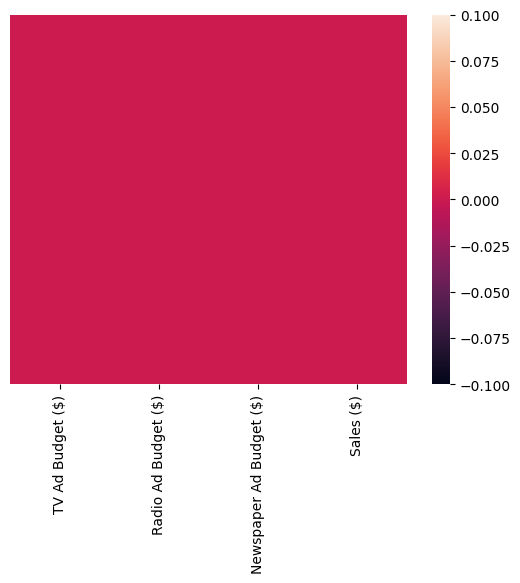

In [7]:
sns.heatmap(data.isnull(), yticklabels=False)

In [8]:
#checking if there is any duplicate value
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [9]:
#hence the data has no duplicate value

In [11]:
#renaming column names for convenience
data.columns = ['TV_Ad_Budget', 'Radio_Ad_Budget', 'Newspaper_Ad_Budget','Sales']
data.head()

,TV_Ad_Budget,Radio_Ad_Budget,Newspaper_Ad_Budget,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [17]:
#Outlier Detection:
#TV
TV_mean = data.TV_Ad_Budget.mean()
print(TV_mean)

TV_std_dev = data.TV_Ad_Budget.std()
print(TV_std_dev)

print(TV_mean+3*TV_std_dev)
print(TV_mean-3*TV_std_dev)

data[(data.TV_Ad_Budget > TV_mean+3*TV_std_dev)| (data.TV_Ad_Budget < TV_mean-3*TV_std_dev)]

147.0425
85.85423631490808
404.60520894472427
-110.52020894472426


,TV_Ad_Budget,Radio_Ad_Budget,Newspaper_Ad_Budget,Sales


In [21]:
#Radio
Radio_mean = data.Radio_Ad_Budget.mean()
print(Radio_mean)

Radio_std_dev = data.Radio_Ad_Budget.std()
print(Radio_std_dev)

print(Radio_mean + 3*Radio_std_dev)
print(Radio_mean - 3*Radio_std_dev)

data[(data.Radio_Ad_Budget > Radio_mean + 3*Radio_std_dev) | (data.Radio_Ad_Budget < Radio_mean - 3*Radio_std_dev)]

23.264000000000006
14.846809176168724
67.80442752850618
-21.276427528506165


,TV_Ad_Budget,Radio_Ad_Budget,Newspaper_Ad_Budget,Sales


In [22]:
#Newspaper

Newspaper_mean = data.Newspaper_Ad_Budget.mean()
print(Newspaper_mean)

Newspaper_std_dev = data.Newspaper_Ad_Budget.std()
print(Newspaper_std_dev)

print(Newspaper_mean+3*Newspaper_std_dev)
print(Newspaper_mean-3*Newspaper_std_dev)

data [(data.Newspaper_Ad_Budget > Newspaper_mean+3*Newspaper_std_dev) | (data.Newspaper_Ad_Budget < Newspaper_mean-3*Newspaper_std_dev)]

30.553999999999995
21.778620838522826
95.88986251556847
-34.781862515568484


,TV_Ad_Budget,Radio_Ad_Budget,Newspaper_Ad_Budget,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [23]:
#there are two outliers in Newspaper Ad Budget

In [24]:
#Alternative way to identify outliers
#Sales
data['zscore_Sales'] = (data.Sales - data.Sales.mean())/data.Sales.std()
data[(data.zscore_Sales< -3) | (data.zscore_Sales > 3)]

,TV_Ad_Budget,Radio_Ad_Budget,Newspaper_Ad_Budget,Sales,zscore_Sales


In [25]:
#No outliers

In [27]:
#removinng the outliers values of Newspaper ad budget
data_no_outlier = data[(data.Newspaper_Ad_Budget< Newspaper_mean+3*Newspaper_std_dev)& (data.Newspaper_Ad_Budget > Newspaper_mean-3*Newspaper_std_dev)]
data_no_outlier

,TV_Ad_Budget,Radio_Ad_Budget,Newspaper_Ad_Budget,Sales,zscore_Sales
0,230.1,37.8,69.2,22.1,1.548168
1,44.5,39.3,45.1,10.4,-0.694304
2,17.2,45.9,69.3,9.3,-0.905135
3,151.5,41.3,58.5,18.5,0.858177
4,180.8,10.8,58.4,12.9,-0.215143
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,-1.230964
196,94.2,4.9,8.1,9.7,-0.828469
197,177.0,9.3,6.4,12.8,-0.234310
198,283.6,42.0,66.2,25.5,2.199827


Visualising the Data

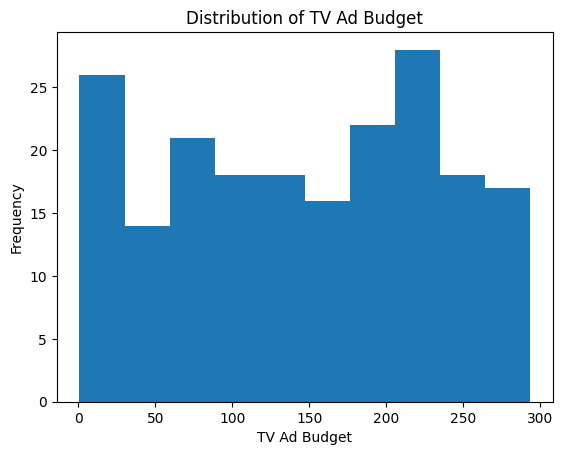

In [28]:
#Distribution Of Tv Ad Budget
data_no_outlier['TV_Ad_Budget'].plot.hist()
plt.title('Distribution of TV Ad Budget')
plt.xlabel('TV Ad Budget')
plt.ylabel('Frequency')
plt.show()

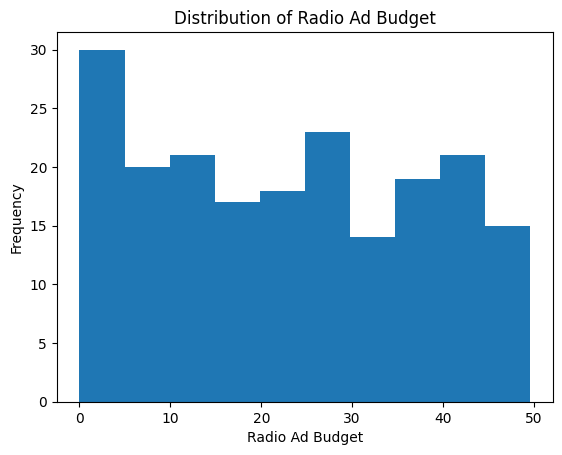

In [30]:
#Distribution of radio Ad budget
data_no_outlier['Radio_Ad_Budget'].plot.hist()
plt.title('Distribution of Radio Ad Budget')
plt.xlabel('Radio Ad Budget')
plt.ylabel('Frequency')
plt.show()

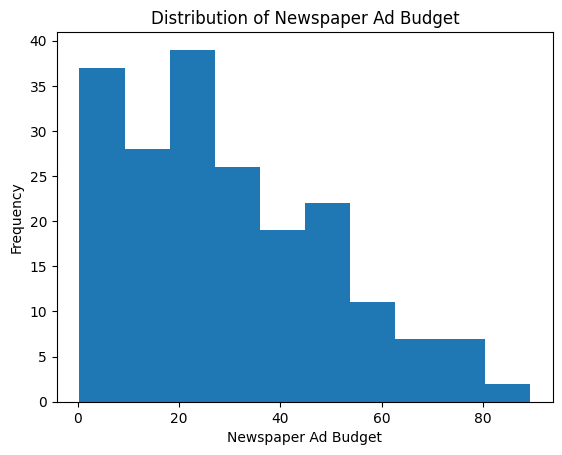

In [31]:
#Distribution of Newspaper Ad budget
data_no_outlier['Newspaper_Ad_Budget'].plot.hist()
plt.title('Distribution of Newspaper Ad Budget')
plt.xlabel('Newspaper Ad Budget')
plt.ylabel('Frequency')
plt.show()

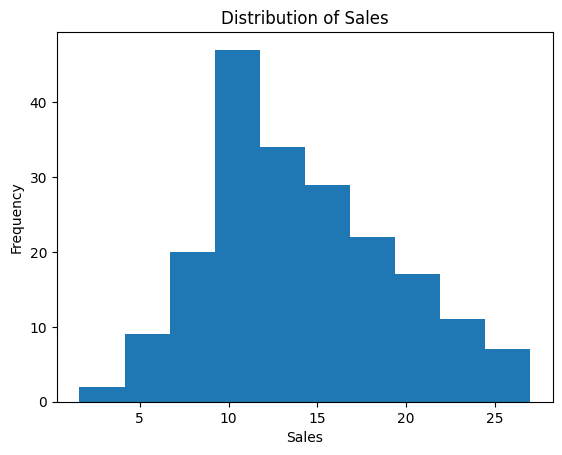

In [32]:
#Distribution Of sales
data_no_outlier['Sales'].plot.hist()
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

<Axes: >

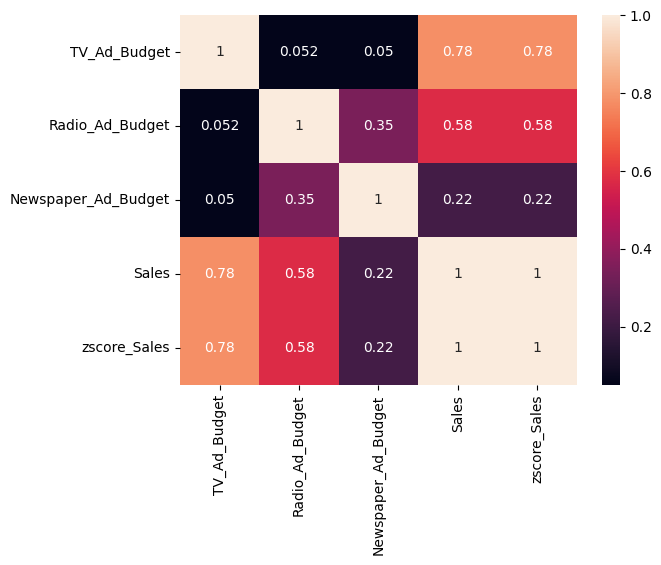

In [33]:
#Correlation Plot
sns.heatmap(data_no_outlier.corr(), annot=True)

C:\Users\himan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\himan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\himan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


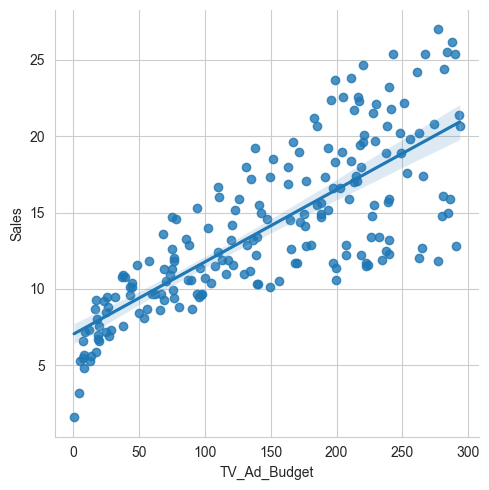

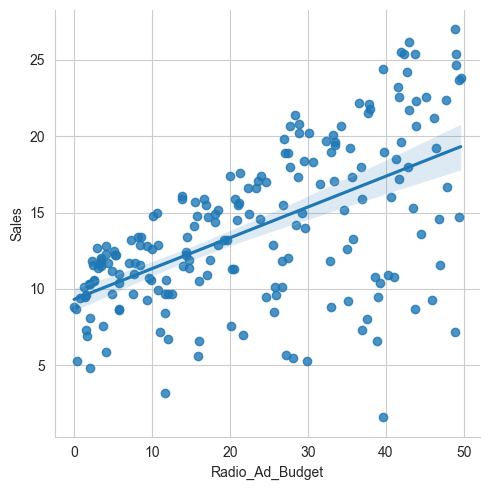

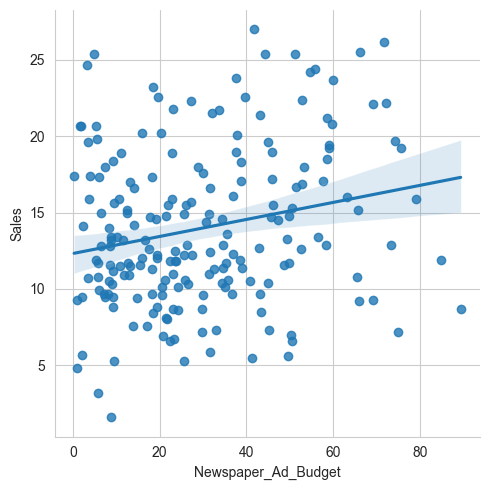

In [35]:
#plotting regression plots each for Tv, radio and Newspaper Ad Budget
sns.set_style('whitegrid')
sns.lmplot(x = 'TV_Ad_Budget', y = 'Sales', data = data_no_outlier)

sns.set_style('whitegrid')
sns.lmplot(x = 'Radio_Ad_Budget' , y = 'Sales', data = data_no_outlier)

sns.set_style('whitegrid')
sns.lmplot(x = 'Newspaper_Ad_Budget' , y = 'Sales', data = data_no_outlier)

## Multiple Linear Regression Model

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [39]:
#defining x and y values
x = data_no_outlier[['TV_Ad_Budget','Radio_Ad_Budget','Newspaper_Ad_Budget']].values
y = data_no_outlier['Sales'].values

In [40]:
#Splitting the Data into training and testing datasets(75% training Data and 25% testing Data)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)

In [43]:
#training the model to predict the future sales
reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [44]:
print(reg)

LinearRegression()


In [45]:
print('The regression Coefficient is:', reg.coef_)

The regression Coefficient is: [ 0.04764663  0.1869678  -0.0029567 ]


In [47]:
print('r2_score is:', np.sqrt(r2_score(y_test, y_pred)))
print('Mean Squared Error is:', mean_squared_error(y_test,y_pred))

r2_score is: 0.9495213632446692
Mean Squared Error is: 2.420963861796851


In [48]:
#predicting the future sales:
Predicted_sales = reg.predict([[230.1,37.8,69.2]])
print(Predicted_sales)

[20.56095013]
